In [1]:
import sys
import os.path as op
import os
sys.path.append('/data_nfs/og86asub/netmap/netmap-evaluation/')

from netmap.src.utils.netmap_config import NetmapConfig
from src.methods.csnet.csnet_config import CsNetConfig
from src.data_simulation.data_simulation_config import DataSimulationConfig
from src.pipelines.utils import PipelineConfig
from captum.attr import GradientShap


import anndata
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment
import scipy.sparse as scs
from sklearn.cluster import SpectralClustering

from src.utils import write_config

import numpy as np
import pandas as pd
from typing import Optional
import itertools
import warnings


In [13]:
import decoupler as dc
from netmap.src.downstream.gene_clustering import *


In [ ]:
dataset_config = "/data_nfs/og86asub/netmap/netmap-evaluation/results/configurations/data_simulation/config_three/net_60_80_net_90_941_net_75_286_net_77_1396.config.yaml"
netmap_config = '/data_nfs/og86asub/netmap/netmap-evaluation/results/netmap/config_4/config_three/net_60_80_net_90_941_net_75_286_net_77_1396//config.yaml'
dataset_config =DataSimulationConfig.read_yaml(dataset_config)

config_dict = {}
config_dict['config_4'] = NetmapConfig.read_yaml(netmap_config)
scgenerai =  sc.read_h5ad(op.join(config_dict[c].output_directory, config_dict[c].adata_filename))
ref_adata = sc.read_h5ad(config_dict[c].input_data)

ill_nan = 0



NameError: name 'DataSimulationConfig' is not defined

In [15]:
df, dist_linkage = get_hierarchical_clustering(ref_adata, genes=None)

/data_nfs/og86asub/netmap/netmap-evaluation/netmap/.pixi/envs/default/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:418: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


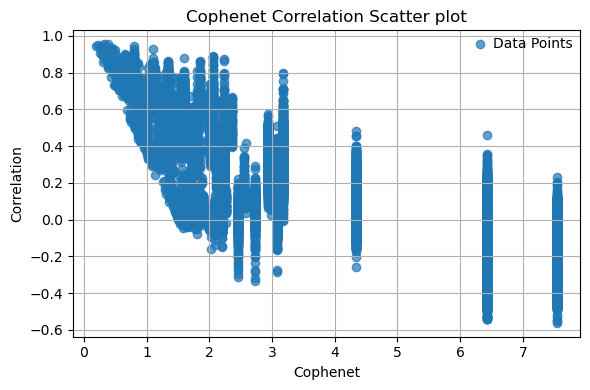

In [16]:
plot_scatter_plot(df)

Automatically determined cluster cutoff distance: 0.7397


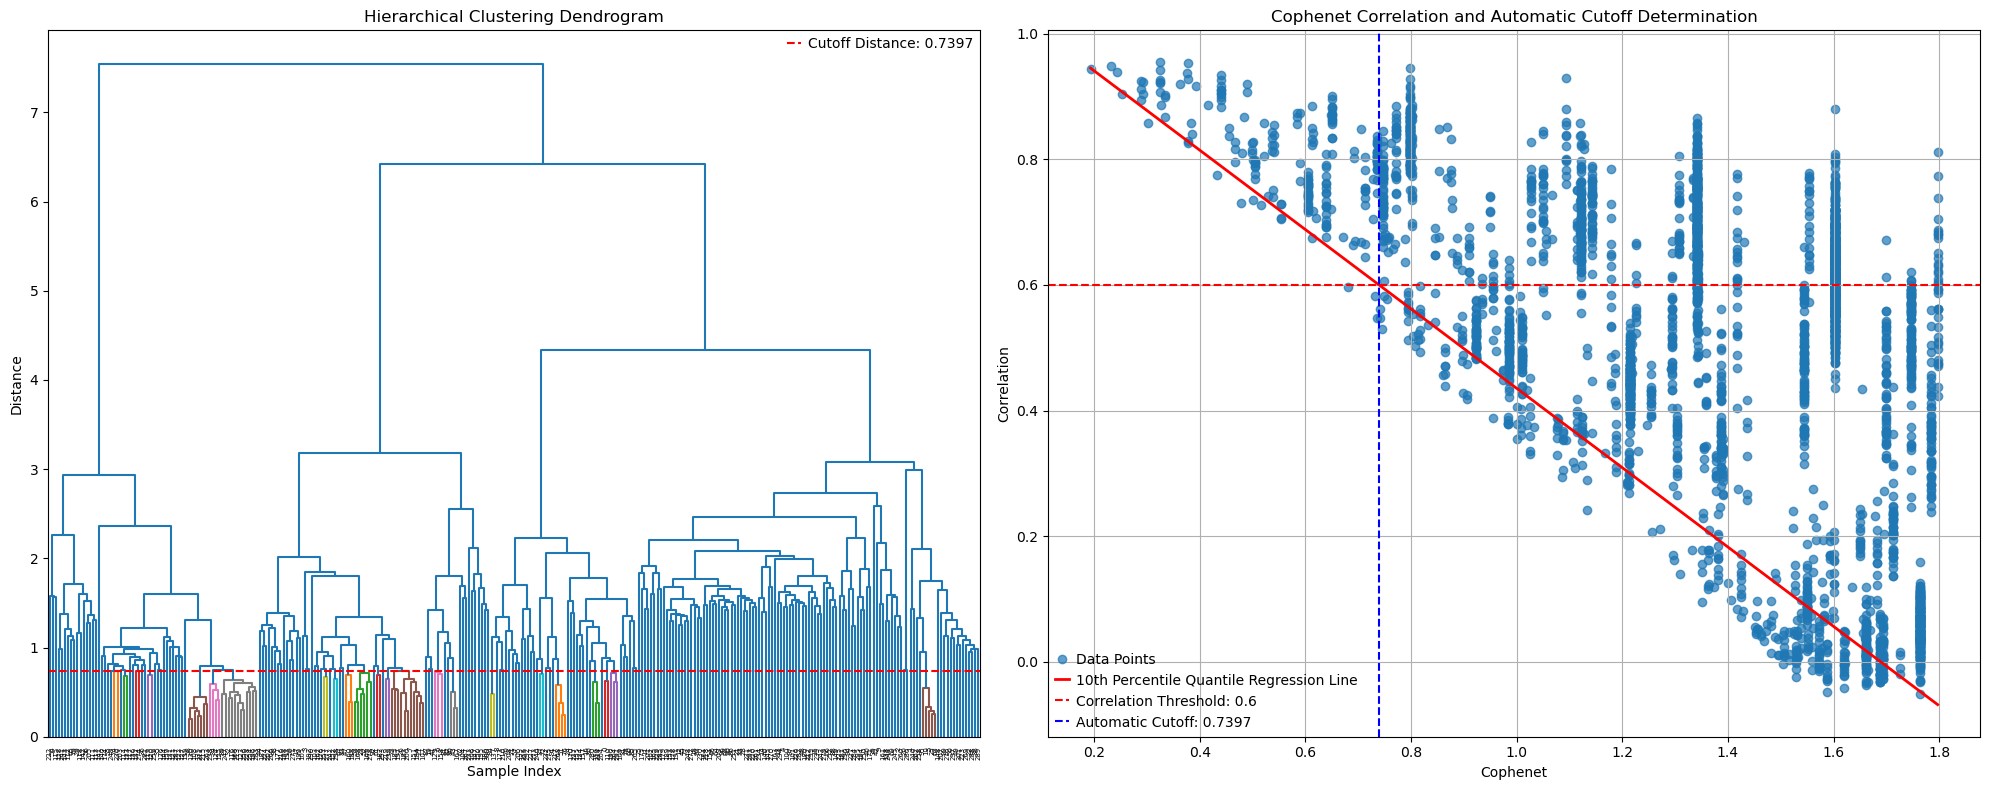

In [17]:
cutoff = compute_regression(df, 1.8, dist_linkage = dist_linkage)

In [18]:
ref_adata = add_clusters_to_adata(ref_adata, cutoff_distance=cutoff, dist_linkage=dist_linkage, cluster_var='target_cluster')
scgenerai.var = scgenerai.var.merge(ref_adata.var, left_on='target', right_on= 'genes')

In [20]:
scgenerai.var

,source,target,genes,target_cluster
0,AARS2,AARS2,AARS2,123
1,ACR,AARS2,AARS2,123
2,ACTA1,AARS2,AARS2,123
3,ACTA2,AARS2,AARS2,123
4,ACTN4,AARS2,AARS2,123
...,...,...,...,...
91199,ZHX1,ZNF615,ZNF615,231
91200,ZNF260,ZNF615,ZNF615,231
91201,ZNF292,ZNF615,ZNF615,231
91202,ZNF384,ZNF615,ZNF615,231
